<a href="https://colab.research.google.com/github/akshayaxo/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymatreader import read_mat

In [ ]:
data = read_mat('D:\Coventry\Final Project/Training_data_MSc.mat')

In [ ]:
data.keys()

dict_keys(['overal_TPM_yearly_prod_diff_percent_mat_2D', 'overall_ref_data_rates_mat_D'])

In [ ]:
df1 = pd.DataFrame(data['overall_ref_data_rates_mat_D'])
df2 = pd.DataFrame(data['overal_TPM_yearly_prod_diff_percent_mat_2D'])
df1=df1.transpose()
df2=df2.transpose()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
print(df1.shape)

(36000, 366)


In [ ]:
df2.head()

,0,1,2,3
0,5.005270,-0.124529,-4.214885,6.513052
1,23.412837,6.908505,7.286204,-8.491588
2,3.897185,4.611377,0.349632,1.961938
3,-11.634999,-6.311221,-11.620861,-1.691778
4,-3.002190,-0.011202,-1.089329,0.376608


In [ ]:
print(df2.shape)

(36000, 4)


In [ ]:
def traindataset(df2,df1):
    X=[]
    for x in range(df2.shape[0]):
        smallest = 0
        index = 0
        for y in range(df2.shape[1]):
            if(abs(df2.loc[x,y])<=2):
                if(smallest==0):
                    smallest= df2.loc[x,y]
                    index = y
                else:
                    if(abs(smallest) > abs(df2.loc[x,y])):
                        smallest = df2.loc[x,y]
                        index = y
        if(smallest == 0):
            X.append(int(5)) 
        else:
            X.append(int(index + 1))
    return X

In [ ]:
updated_df2=traindataset(df2,df1)
print(updated_df2)

[2, 5, 3, 4, 2, 2, 1, 4, 3, 3, 4, 3, 2, 2, 4, 3, 4, 4, 2, 3, 3, 4, 4, 2, 5, 3, 5, 3, 4, 5, 4, 5, 3, 5, 5, 1, 4, 4, 4, 1, 5, 3, 4, 3, 4, 5, 4, 4, 4, 1, 1, 4, 3, 2, 4, 2, 1, 4, 5, 4, 3, 2, 5, 4, 4, 5, 4, 1, 3, 3, 4, 1, 1, 3, 2, 1, 5, 2, 3, 3, 5, 4, 1, 3, 2, 3, 3, 3, 4, 3, 5, 4, 1, 5, 2, 2, 4, 5, 3, 3, 3, 4, 5, 5, 4, 2, 2, 4, 3, 1, 2, 3, 5, 2, 4, 3, 4, 5, 4, 1, 3, 3, 2, 4, 3, 4, 5, 4, 1, 4, 1, 4, 5, 5, 2, 2, 3, 4, 2, 1, 4, 4, 4, 5, 3, 3, 3, 2, 4, 3, 2, 1, 4, 1, 4, 5, 5, 4, 3, 5, 5, 3, 5, 3, 5, 4, 2, 4, 3, 2, 4, 3, 4, 1, 3, 5, 3, 4, 2, 2, 5, 3, 1, 3, 2, 2, 5, 1, 5, 2, 3, 3, 4, 3, 2, 4, 5, 5, 4, 2, 2, 3, 4, 3, 5, 5, 3, 1, 3, 1, 4, 3, 5, 3, 4, 5, 1, 4, 4, 5, 2, 5, 3, 4, 3, 2, 4, 1, 4, 5, 2, 4, 2, 3, 5, 3, 4, 4, 3, 4, 5, 1, 1, 1, 4, 3, 3, 4, 4, 5, 3, 4, 3, 3, 1, 4, 4, 2, 4, 2, 4, 4, 1, 2, 5, 4, 4, 4, 1, 5, 3, 3, 5, 3, 5, 5, 3, 1, 5, 4, 4, 4, 4, 5, 4, 3, 3, 2, 1, 5, 5, 4, 5, 2, 2, 5, 5, 2, 4, 5, 5, 3, 3, 3, 4, 4, 2, 2, 3, 2, 4, 2, 5, 5, 4, 4, 2, 4, 1, 4, 3, 3, 2, 4, 4, 4, 3, 3, 3, 4, 1, 4, 1, 

In [ ]:
updated_df2=np.array(updated_df2)
updated_df2=updated_df2.reshape(36000,1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# print(df1)
x_train = df1[0:30000,]
x_test = df1[30001:,]
y_train = updated_df2[0:30000,]
y_test = updated_df2[30001:,]
#X_train_OverSampled, y_train_OverSampled = oversample.fit_resample(x_train, y_train)

In [ ]:
# transform the dataset
from imblearn.under_sampling import RandomUnderSampler 
undersample = RandomUnderSampler()
X_train_UnderSampled, Y_train_UnderSampled = undersample.fit_resample(x_train,y_train)
print(X_train_UnderSampled)

[[0.40324068 0.51678286 0.36752207 ... 0.45942872 0.41142301 0.36253853]
 [0.38742501 0.34720546 0.36475033 ... 0.31107315 0.32217286 0.22092062]
 [0.25288118 0.3015087  0.37155939 ... 0.47650792 0.44929136 0.37358165]
 ...
 [0.47569456 0.42280003 0.34680194 ... 0.46182032 0.33826714 0.26299426]
 [0.47269413 0.34188749 0.35010649 ... 0.33438749 0.40371263 0.37618778]
 [0.26059282 0.27586964 0.28067417 ... 0.3317679  0.27887717 0.25939405]]


In [ ]:
# creating an object of LinearRegression class
LR = LogisticRegression()
# fitting the training data
LR.fit(X_train_UnderSampled,Y_train_UnderSampled)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction.shape

(5999,)

In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_prediction)
print('Accuracy socre is ',score)

Accuracy socre is  0.21020170028338056


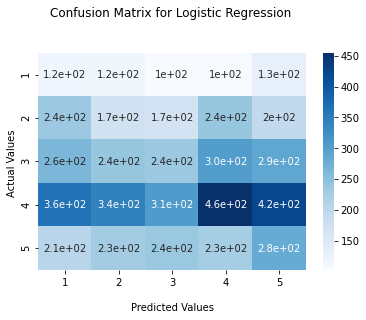

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,y_prediction)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Logistic Regression \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression(random_state = 10)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [100, 10, 1.0, 0.1, 0.01]
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=650)
neigh.fit(X_train_UnderSampled,Y_train_UnderSampled)
y_pred = neigh.predict(x_test)

In [ ]:
score =accuracy_score(y_test,y_pred)
print('Accuracy socre is ',score)

Accuracy socre is  0.2503750625104184


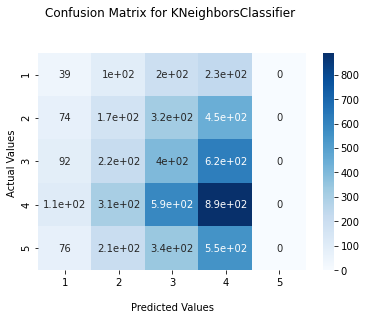

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for KNeighborsClassifier \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

#List Hyperparameters that we want to tune.
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

#Create new KNN object
knn_2 = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn_2, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(x_train,y_train)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

# 10-fold cross-validation logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, df1, updated_df2.loc[4], cv=10, scoring='accuracy')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_prediction) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_prediction)))
plt.ylabel('True label')

plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train_UnderSampled,Y_train_UnderSampled)

DecisionTreeClassifier()

In [ ]:
y_dtc = model2.predict(x_test)
print(y_dtc)

[2 1 4 ... 3 1 2]


In [ ]:
score =accuracy_score(y_test,y_dtc)
print('Accuracy socre is ',score)

Accuracy socre is  0.23237206201033506


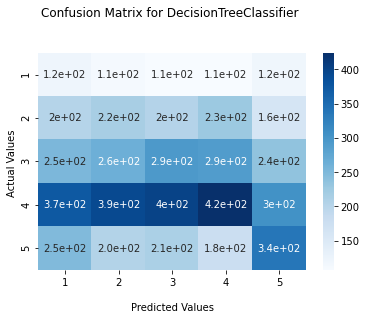

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,y_dtc)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for DecisionTreeClassifier \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


x_train = x_train.reshape(-1, 1, 366)
x_test  = x_test.reshape(-1, 1, 366)
y_train = y_train.reshape(-1, 1, 1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(80,input_shape=(1, 366)))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 80)                143040    
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 143,850
Trainable params: 143,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 12.0854 - accuracy: 0.1033 - val_loss: 12.1052 - val_accuracy: 0.1359
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0854 - accuracy: 0.1065 - val_loss: 12.1052 - val_accuracy: 0.0877
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0854 - accuracy: 0.1071 - val_loss: 12.1052 - val_accuracy: 0.1735
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0853 - accuracy: 0.1058 - val_loss: 12.1052 - val_accuracy: 0.1012
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0854 - accuracy: 0.1053 - val_loss: 12.1052 - val_accuracy: 0.1330
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0853 - accuracy: 0.1033 - val_loss: 12.1052 - val_accuracy: 0.0815
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 12.0854 - accuracy: 0.1020 - val_loss: 12.1052 - val_accuracy:

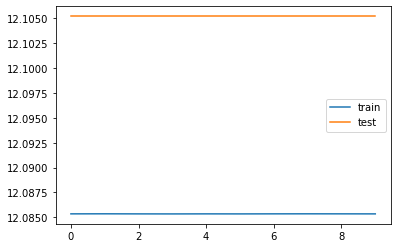

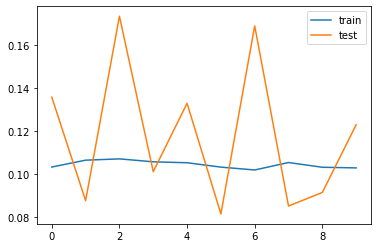

In [ ]:
from matplotlib import pyplot

# plot history
pyplot.plot(model.history.history['loss'], label='train')
pyplot.plot(model.history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(model.history.history['accuracy'], label='train')
pyplot.plot(model.history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
score =accuracy_score(y_test,y_pred)
print('Accuracy socre is ',score)

Accuracy socre is  0.2503750625104184


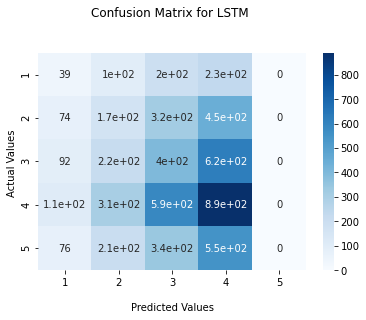

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for LSTM \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()